In [11]:
import numpy as np
from glob import glob
from typing import List
from fnmatch import fnmatch
import matplotlib.pyplot as plt

In [12]:
#root_path = r'D:\sd_dynObj'
file_pattern = '*_grid.npz'
root_path = r'D:\npz_files'
_MAX_LENGTH =25


def get_all_bag_paths(root:str,pattern:str)->List[str]:
    list_all_bags=[]
    for path, subdirs, files in os.walk(root):
        for name in files:
            if fnmatch(name, pattern):
                list_all_bags.append((os.path.join(path, name)))

    return list_all_bags

In [20]:

all_grid_paths=get_all_bag_paths(root_path,pattern=file_pattern)
all_init_paths = get_all_bag_paths(root_path,pattern="*_init_path.npz")
all_opt_paths = get_all_bag_paths(root_path,pattern="*_opt_path.npz")
len(all_opt_paths)

75

## Check data imbalance- optimized paths vs non optimized paths

In [17]:
def check_imbalance(init_path_arr,opt_path_arr):
    count=0
    assert len(opt_path_arr)==len(init_path_arr)
    for i in range(len(init_path_arr)):
        if np.array_equal(init_path_arr[i],opt_path_arr[i]):
            count +=1
    if len(init_path_arr)>0:
        print(f"Paths that are not optimized: {count}, which is {count/len(init_path_arr)*100:.2f} % of total data")
        print(f"Paths that are optimized: {(len(init_path_arr)-count)}, which is {((len(init_path_arr)-count)/len(init_path_arr))*100:.2f} % of total data\n")

#check_imbalance(init,opt)

In [22]:
for i in range(len(all_grid_paths)):
    #arr=np.load(all_grid_paths[i])
    init = np.load(all_init_paths[i])
    opt = np.load(all_opt_paths[i])
    bag_name = (all_grid_paths[i].split('\\')[-2])
    folder_name = (all_grid_paths[i].split('\\')[-2])
    scene_name = (all_grid_paths[i].split('\\')[-3])
    print(f"Bag Name: {os.path.join(scene_name,folder_name,bag_name)} -->")
    check_imbalance(init["init_path"],opt["opt_path"])

Bag Name: scenario5\2021-06-10_14-16-49\2021-06-10_14-16-49 -->
Paths that are not optimized: 163, which is 97.60 % of total data
Paths that are optimized: 4, which is 2.40 % of total data

Bag Name: scenario5\2021-06-10_14-16-49\2021-06-10_14-16-49 -->
Paths that are not optimized: 171, which is 92.93 % of total data
Paths that are optimized: 13, which is 7.07 % of total data

Bag Name: scenario5\2021-06-10_14-16-49\2021-06-10_14-16-49 -->
Paths that are not optimized: 98, which is 94.23 % of total data
Paths that are optimized: 6, which is 5.77 % of total data

Bag Name: scenario5\2021-06-10_14-25-32\2021-06-10_14-25-32 -->
Paths that are not optimized: 40, which is 93.02 % of total data
Paths that are optimized: 3, which is 6.98 % of total data

Bag Name: scenario5\2021-06-10_14-36-07\2021-06-10_14-36-07 -->
Paths that are not optimized: 152, which is 92.68 % of total data
Paths that are optimized: 12, which is 7.32 % of total data

Bag Name: scenario5\2021-06-10_14-36-07\2021-06-10

In [82]:
## visualize grids and paths

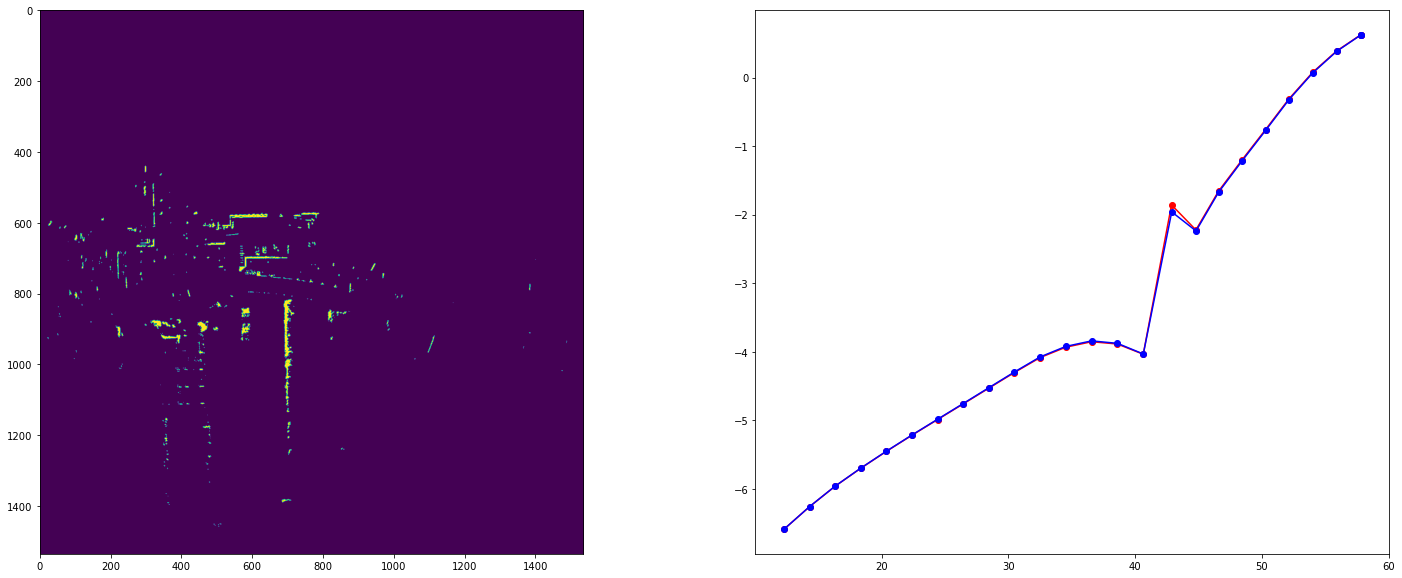

In [99]:
test_idx=38
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.imshow(arr[test_idx])
plt.subplot(1,2,2)
plt.plot(init[test_idx,:,0],init[test_idx,:,1],'o-', color='red')
plt.plot(opt[test_idx,:,0],opt[test_idx,:,1],'o-', color='blue')

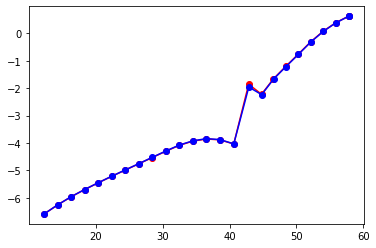

In [94]:
#test_idx=38
plt.plot(init[test_idx,:,0],init[test_idx,:,1],'o-', color='red')
plt.plot(opt[test_idx,:,0],opt[test_idx,:,1],'o-', color='blue')